# Seperating Galaxies in CAMELS into subgroups of Elliptical and Spiral.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import h5py
import hdf5plugin

In [2]:
# snapshot name
snapshot = r'C:\CAMELS DATA\LH643_snap_033.hdf5'
# open the catalogue
f = h5py.File(snapshot, 'r')
# looking to see data in cataloge
def print_dataset_name(name,g):
    print(name,'&',g)
f.visititems(print_dataset_name)

Header & <HDF5 group "/Header" (0 members)>
PartType0 & <HDF5 group "/PartType0" (26 members)>
PartType0/CenterOfMass & <HDF5 dataset "CenterOfMass": shape (14814094, 3), type "<f4">
PartType0/Coordinates & <HDF5 dataset "Coordinates": shape (14814094, 3), type "<f8">
PartType0/Density & <HDF5 dataset "Density": shape (14814094,), type "<f4">
PartType0/ElectronAbundance & <HDF5 dataset "ElectronAbundance": shape (14814094,), type "<f4">
PartType0/EnergyDissipation & <HDF5 dataset "EnergyDissipation": shape (14814094,), type "<f4">
PartType0/GFM_AGNRadiation & <HDF5 dataset "GFM_AGNRadiation": shape (14814094,), type "<f4">
PartType0/GFM_CoolingRate & <HDF5 dataset "GFM_CoolingRate": shape (14814094,), type "<f4">
PartType0/GFM_Metallicity & <HDF5 dataset "GFM_Metallicity": shape (14814094,), type "<f4">
PartType0/GFM_Metals & <HDF5 dataset "GFM_Metals": shape (14814094, 10), type "<f4">
PartType0/GFM_MetalsTagged & <HDF5 dataset "GFM_MetalsTagged": shape (14814094, 6), type "<f4">
Part

In [3]:
pos_gas = f['PartType0/Coordinates'][:]/1e3  # gas particle positions
mass_gas = f['PartType0/Masses'][:]*1e10     # gas mass in Msun
pos_dm = f['PartType1/Coordinates'][:]/1e3  # dark metter positions in Mpc/h
dens_dm = f['PartType1/SubfindDMDensity'][:]*1e10/1e3**3 # density of nearest 64 dm particles in Msun/Mpc^3
rad_dm = f['PartType1/SubfindHsml'][:]*1e3  #radius of nearest 64 dm particles Mpc/h
pos_s = f['PartType4/Coordinates'][:]/1e3  # star positions in Mpc/h
mass_s = f['PartType4/Masses'][:]*1e10     # Star mass in Msun
dens_s = f['PartType4/SubfindDensity'][:]*1e10/1e3**3 # density in Msun/Mpc^3
pos_BH = f['PartType5/Coordinates'][:]/1e3  # star positions in Mpc/h
mass_BH = f['PartType5/Masses'][:]*1e10     # gas mass
# close file
f.close()
# Estimating the mass of each DM particle
V_dm = 4/3 *np.pi*rad_dm**3
mass_dm = dens_dm * V_dm / 64  # average mass of particle given the 64 surrounding dark matter particles

# getting galaxy positions catalogue name
catalogue = r'C:\CAMELS DATA\LH643_fof_subhalo_tab_033.hdf5'
# open the catalogue
f = h5py.File(catalogue, 'r')
pos_sh  = f['Subhalo/SubhaloPos'][:]/1e3     #positions of SUBFIND subhalos in Mpc/h
subh_M_R_12 = f['Subhalo/SubhaloMassInRadType'][:,4]*1e10 # total stellar mass of twice the stellare alf-mass radius in Msun/h
L_sh = f['Subhalo/SubhaloSpin'][:]/1e3 # total Angular momentum of Subhalo in Mpc.km/s
v_sh = f['Subhalo/SubhaloVel'][:]   # Peculiar velocity km/s
# close file
f.close()
pos_g = pos_sh[subh_M_R_12>1e8]
Spin_g = L_sh[subh_M_R_12>1e8]
v_g =  v_sh[subh_M_R_12>1e8]
mass_g = subh_M_R_12[subh_M_R_12>1e8]
print('Galaxy positions shape: ', pos_g.shape) # we state galaxies are subhalos with stellar mass > 1e8 Msun

Galaxy positions shape:  (2061, 3)


In [4]:
ang_mom_g = mass_g*np.linalg.norm(Spin_g,axis=1)# angular momentum of each galaxy
print(ang_mom_g[:100])
tot_KE_glxy = 0.5*mass_g*np.linalg.norm(v_g,axis=1)**2
print(tot_KE_glxy[:100])

[6.13805101e+13 1.71310252e+11 7.28763105e+10 2.33107886e+10
 3.41812480e+09 1.43494461e+10 1.92414024e+10 3.89523328e+09
 1.15680686e+10 1.28865946e+10 2.44341120e+09 3.13644442e+09
 1.94682560e+09 1.45758605e+09 5.60170291e+09 4.51147827e+09
 1.39714854e+09 8.57263040e+08 1.82465728e+09 2.07142938e+09
 1.14517798e+09 8.09782016e+08 3.55102925e+09 3.64802048e+08
 6.50519616e+08 1.52807360e+09 8.99856192e+08 5.73602112e+08
 4.99732480e+08 1.41859827e+09 3.97355840e+08 3.71795904e+08
 3.28923552e+08 1.00878989e+09 2.50571728e+08 5.66027648e+08
 5.78898752e+08 1.10035408e+08 1.25818952e+08 5.86314752e+08
 7.40338048e+08 9.08982720e+07 5.79334016e+08 2.35991872e+08
 2.01198672e+08 2.51657680e+08 4.26118432e+08 4.69573216e+08
 1.33354512e+08 2.56640272e+08 5.21465960e+07 8.22796560e+07
 9.45747600e+07 1.11057312e+08 2.91018528e+08 9.39688080e+07
 2.27178720e+08 1.12124064e+08 4.01259680e+07 1.66345152e+08
 1.24089976e+08 6.62048800e+07 8.24037200e+07 8.91616400e+07
 1.11272760e+08 7.823890

#### slicing Dark matter, Gas, Stars, Black holes and galaxies

In [5]:
def slicer(array, num_slices=15, mass_array=None, mass=False):
    '''Slices positions of particles in a box along the z axis
    array has shape (N,3)
    (if mass=True we also slice the mass of the particle with index corresponding to index in position array)
    Returns a dictionary (or two) with each section containing positions of that slice'''
    box_length = 25.0  # Length of the 3D box
    pos_index = 0
    slice_size = box_length / num_slices  # Size of each slice along the z-axis
    # Initialize an empty dictionary to store the particle positions for each slice
    sliced_positions = {}
    sliced_masses = {}
    # Initialize the dictionary with empty arrays for each slice
    for i in range(num_slices):
        sliced_positions[i] = []
        if mass == True:
            sliced_masses[i] = []
    # Iterate over each particle position
    for position in array:
        # Calculate the index of the slice based on the z-coordinate
        slice_index = int(position[2] // slice_size)

        # Append the position to the corresponding slice's array
        sliced_positions[slice_index].append(position)
        if mass==True:
            sliced_masses[slice_index].append(mass_array[pos_index])
            pos_index +=1

    # Convert the lists to numpy arrays
    for slice_index in sliced_positions:
        sliced_positions[slice_index] = np.array(sliced_positions[slice_index])
        if mass==True: 
            sliced_masses[slice_index] = np.array(sliced_masses[slice_index])
    # Print the positions for each slice
    for slice_index in sliced_positions:
        print(f"Slice {slice_index} shape: ", sliced_positions[slice_index].shape)
    if mass==True:
        return sliced_positions, sliced_masses
    else:
        return sliced_positions

In [6]:
sliced_gas, sliced_gas_mass = slicer(pos_gas, num_slices=15, mass_array=mass_gas, mass=True) # slicing stars with respecitve star mass
sliced_dm, sliced_dm_mass = slicer(pos_dm, num_slices=15, mass_array=mass_dm, mass=True) # slicing dark metter with respecitve mass
sliced_s, sliced_s_den = slicer(pos_s, num_slices=15, mass_array=dens_s, mass=True) # slicing stars with respecitve surrounding density
sliced_s, sliced_s_mass = slicer(pos_s, num_slices=15, mass_array=mass_s, mass=True) # slicing stars with respecitve star mass
sliced_BH, sliced_BH_mass = slicer(pos_BH, num_slices=15, mass_array=mass_BH, mass=True) # slicing stars with respecitve star mass
sliced_g, sliced_AngMom = slicer(pos_g, num_slices=15, mass_array=ang_mom_g, mass=True) # slicing galaxies
sliced_g, sliced_KE = slicer(pos_g, num_slices=15, mass_array=tot_KE_glxy, mass=True) # slicing galaxies

Slice 0 shape:  (1065335, 3)
Slice 1 shape:  (499789, 3)
Slice 2 shape:  (435793, 3)
Slice 3 shape:  (434473, 3)
Slice 4 shape:  (509669, 3)
Slice 5 shape:  (632367, 3)
Slice 6 shape:  (1110588, 3)
Slice 7 shape:  (560468, 3)
Slice 8 shape:  (825447, 3)
Slice 9 shape:  (909180, 3)
Slice 10 shape:  (857788, 3)
Slice 11 shape:  (931179, 3)
Slice 12 shape:  (1148999, 3)
Slice 13 shape:  (3411513, 3)
Slice 14 shape:  (1481506, 3)
Slice 0 shape:  (1209864, 3)
Slice 1 shape:  (492697, 3)
Slice 2 shape:  (452736, 3)
Slice 3 shape:  (430745, 3)
Slice 4 shape:  (560131, 3)
Slice 5 shape:  (702403, 3)
Slice 6 shape:  (1397609, 3)
Slice 7 shape:  (503754, 3)
Slice 8 shape:  (883426, 3)
Slice 9 shape:  (1019243, 3)
Slice 10 shape:  (1100612, 3)
Slice 11 shape:  (1005575, 3)
Slice 12 shape:  (1222618, 3)
Slice 13 shape:  (4013537, 3)
Slice 14 shape:  (1782266, 3)
Slice 0 shape:  (118601, 3)
Slice 1 shape:  (20139, 3)
Slice 2 shape:  (23228, 3)
Slice 3 shape:  (20018, 3)
Slice 4 shape:  (35715, 3)
S

#### Assigning Gas, dark matter, stars and black holes to a galaxy

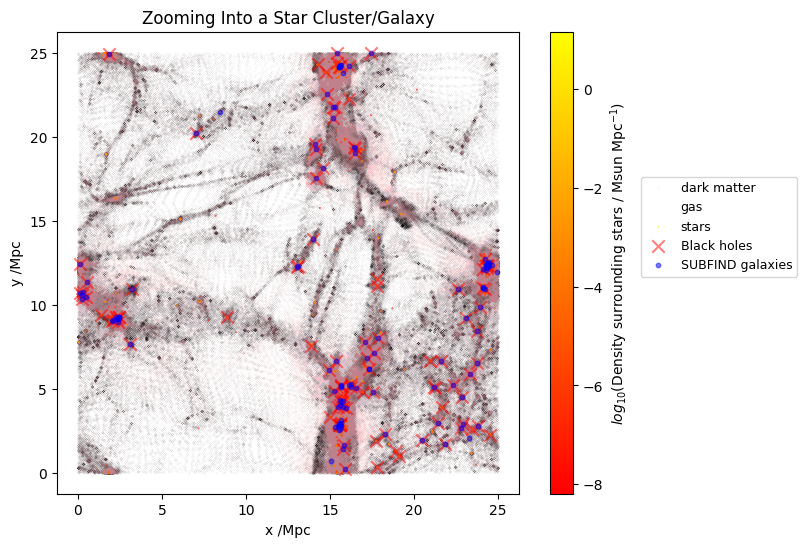

In [7]:
_slice_ = 10
gas_p = sliced_gas[_slice_]
gas_m = sliced_gas_mass[_slice_]
dm_p = sliced_dm[_slice_]
dm_m = sliced_dm_mass[_slice_]
star_p = sliced_s[_slice_]
star_m = sliced_s_mass[_slice_]
BH_p = sliced_BH[_slice_]
BH_m = sliced_BH_mass[_slice_]
galaxy_p = sliced_g[_slice_]
galaxy_AngMom = sliced_AngMom[_slice_]
galaxy_KE = sliced_KE[_slice_]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.scatter(dm_p[:,1], dm_p[:,0], marker='o', s=0.0008, alpha=0.8,c='k', label='dark matter')
ax.scatter(gas_p[:,1], gas_p[:,0], marker='o', s=0.0008, alpha=0.4,c='pink', label='gas')
im= ax.scatter(star_p[:,1] , star_p[:,0], c=np.log10(sliced_s_den[_slice_]),
               marker='o', s=0.1, alpha=1,cmap='autumn', label='stars')
ax.scatter(BH_p[:,1], BH_p[:,0], marker='x', s=80, alpha=0.5,c='red',label='Black holes')
ax.scatter(galaxy_p[:,1] , galaxy_p[:,0], marker='o', s=10, alpha=0.5,c='b', label='SUBFIND galaxies')
cbar = plt.colorbar(im, ax=ax)
cbar.set_label(r'$log_{10}$(Density surrounding stars / Msun Mpc$^{-1}$)')
ax.set_xlabel('x /Mpc')
ax.set_ylabel('y /Mpc')
ax.set_title(f'Zooming Into a Star Cluster/Galaxy')
ax.set_box_aspect(1)
ax.legend(bbox_to_anchor=(1.25, 0.70), prop={'size': 9})
plt.show()

In [8]:
from scipy.spatial import cKDTree

def assign_star_to_galaxy_kdtree(pos_s, pos_g, threshold):
    # Build KDTree using galaxy positions
    kdtree = cKDTree(pos_g)

    # Initialize an array to keep track of assigned star particles
    assigned = np.zeros(len(pos_s), dtype=bool)

    # Initialize an array to store the assignment of each star particle to a galaxy particle
    assignment = -np.ones(len(pos_s), dtype=int)  # The index of the galaxy particle

    for i, star_pos in enumerate(pos_s):
        # Find the index of the nearest galaxy particle and its distance
        nearest_galaxy_index = kdtree.query(star_pos, k=1)[1]
        distance = kdtree.query(star_pos, k=1)[0]

        if distance < threshold:
            assigned[i] = True
            assignment[i] = nearest_galaxy_index

    return assigned, assignment

In [9]:
assigned_gas, assignment_gas = assign_star_to_galaxy_kdtree(gas_p, galaxy_p, threshold=0.05)
assigned_dm, assignment_dm = assign_star_to_galaxy_kdtree(dm_p, galaxy_p, threshold=0.05)
assigned_star, assignment_star = assign_star_to_galaxy_kdtree(star_p, galaxy_p, threshold=0.05)
assigned_BH, assignment_BH = assign_star_to_galaxy_kdtree(BH_p, galaxy_p, threshold=0.05)
print("Assigned gas: ", gas_p[assigned_gas].shape)
print("Unassigned gas: ", gas_p[~assigned_gas].shape)
print("Assigned dark matter: ", dm_p[assigned_dm].shape)
print("Unassigned dark matter: ", dm_p[~assigned_dm].shape)
print("Assigned stars: ", star_p[assigned_star].shape)
print("Unassigned stars: ", star_p[~assigned_star].shape)
print("Assigned Black Holes: ", BH_p[assigned_BH].shape)
print("Unassigned Black Holes: ", BH_p[~assigned_BH].shape)

Assigned gas:  (26005, 3)
Unassigned gas:  (831783, 3)
Assigned dark matter:  (223557, 3)
Unassigned dark matter:  (877055, 3)
Assigned stars:  (107800, 3)
Unassigned stars:  (7427, 3)
Assigned Black Holes:  (91, 3)
Unassigned Black Holes:  (22, 3)


### Calculating the moment of Inertia and thus rotational KE of each Galaxy

In [10]:
def moment_of_inertia(abs_positions, centre, masses):
    ''' calculates the moment of inertia of number N objects about a -centre-
        abs_positions shape is (N, 3)
        corresponding masses shape is (N)'''
    
    rel_positions = abs_positions - centre # positions from the centre
    rel_r_squared = rel_positions[:,0]**2 + rel_positions[:,1]**2 + rel_positions[:,2]**2
    return np.sum(masses*rel_r_squared)

In [11]:
I_glxys = np.zeros(len(galaxy_p))

for i in range(len(galaxy_p)):
    I_gas = moment_of_inertia(gas_p[assignment_gas==i], galaxy_p[i], gas_m[assignment_gas==i])
    I_dm = moment_of_inertia(dm_p[assignment_dm==i], galaxy_p[i], dm_m[assignment_dm==i])
    I_star = moment_of_inertia(star_p[assignment_star==i], galaxy_p[i], star_m[assignment_star==i])
    I_BH = moment_of_inertia(BH_p[assignment_BH==i], galaxy_p[i], BH_m[assignment_BH==i])
    
    I_glxys[i] = I_gas + I_dm + I_star + I_BH
print(I_glxys)

[1.46711943e+09 8.07189603e+07 6.65904755e+07 3.06411105e+08
 3.50254074e+08 1.57463326e+07 6.93809083e+07 7.32960153e+08
 1.20300982e+08 1.78057291e+07 6.15128583e+07 5.23618835e+08
 2.22255604e+08 5.18803774e+08 3.64769587e+07 6.77543553e+08
 2.56655402e+08 6.20597769e+08 3.64008284e+08 1.58711408e+09
 1.40257647e+08 1.21129837e+08 2.93313168e+07 2.66090519e+08
 3.49838937e+08 1.10697872e+07 1.67561929e+08 3.68022939e+07
 1.32810482e+08 1.13123382e+07 7.06812316e+06 1.03576175e+09
 2.40083466e+08 6.92527916e+07 3.05736791e+07 3.74287078e+07
 2.89128551e+07 4.14619029e+07 1.52516688e+08 3.62077811e+08
 1.02217886e+09 5.34128818e+07 2.89512359e+07 2.74182646e+07
 1.01878485e+09 1.06921269e+08 3.90349485e+08 1.10987748e+08
 1.78006689e+08 1.76519847e+08 2.83578660e+08 1.80412298e+08
 5.54546759e+07 4.48658783e+08 2.24345622e+08 3.43081413e+08
 2.10643338e+08 1.61166502e+08 3.19933344e+08 2.78072772e+08
 2.67269598e+08 3.48872801e+07 2.65462335e+08 2.53006512e+08
 1.96547696e+08 2.325398

In [12]:
rot_KE_glxys = 0.5*galaxy_AngMom**2 / I_glxys

In [13]:
ratio = rot_KE_glxys/galaxy_KE
print(ratio)

[7.29200419e-03 1.59163946e-05 1.81761338e-05 7.20411504e-08
 4.52057810e-09 6.15143690e-07 2.34104387e-08 1.14210830e-11
 4.90618642e-09 5.01702649e-08 1.43657481e-08 3.25062267e-10
 2.54462890e-10 1.57432343e-01 5.71990513e-07 3.56611414e-09
 5.08307872e-11 2.56383471e-10 2.48800123e-11 3.41973485e-01
 2.11685758e-06 3.20557219e-07 2.56092167e-05 3.49896528e-08
 1.13930362e-08 1.41650794e-05 1.65840760e-08 3.89984444e-07
 8.75479435e-08 2.98644462e-07 5.07781775e-07 4.41230994e-03
 8.48817563e-05 5.51431412e-06 2.17731466e-05 7.45159372e-07
 7.90112956e-08 4.60837055e-08 3.10026758e-09 4.07529321e-10
 5.50962645e-03 5.16971610e-07 1.56146905e-06 1.06581492e-07
 7.81043325e-04 1.09259301e-06 1.35156363e-03 8.86513011e-08
 1.30999087e-07 3.25312090e-09 4.64638057e-03 1.42777520e-05
 1.18651685e-04 6.27257885e-03 8.86478751e-06 5.55683461e-02
 1.58207514e-02 1.51607299e-08 4.29360369e-04 9.96473217e-05
 2.96288899e-03 9.63382755e-08 1.60926463e-04 7.97140787e-04
 3.19618025e-03 6.678365